## Introduction 

### About dataset
* This is a dataset containing a list of serious injuries and deaths in which one or more subjects of a selfie were killed or injured before, during, or after taking a photo of themselves, with the accident at least in part attributed to taking the photo


### Import libraries 

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Load dataset

In [3]:
df = pd.read_csv('Selfie_Related_Injuries.csv')

### Show dataset

In [4]:
df.head()

,Date,Country,Injuries/Casualties,Type,Description
0,10/15/2011,United States,3,Transport,Three teenagers (two sisters and a friend) wer...
1,3/1/2014,Spain,1,Electrocution,A 21-year-old man was electrocuted after climb...
2,3/1/2014,Russia,1,Transport,Two people were walking near train tracks when...
3,4/1/2014,United States,1,Transport,A 32-year-old woman from North Carolina was dr...
4,4/22/2014,Russia,1,Fall,A 17-year-old girl fell 30 ft to her death aft...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 192 non-null    object
 1   Country              192 non-null    object
 2   Injuries/Casualties  192 non-null    int64 
 3   Type                 192 non-null    object
 4   Description          192 non-null    object
dtypes: int64(1), object(4)
memory usage: 7.6+ KB


#### notes:
    - Date column is an object , it's must be date
    - no null values 

### Dataset Preprocessing

In [7]:
# Convert datatype 
df['Date'] = pd.to_datetime(df['Date'])

In [13]:
# Check duplicates 
df.duplicated().sum()

0

In [9]:
# Shape of dataset 
print (df.shape)

(192, 5)


#### note:
    - The dataset contains 192 rows & 5 columns with no duplicates rows 

In [18]:
# Some statistical info 
df.describe().round(2)

,Date,Injuries/Casualties
count,192,192.00
mean,2016-11-20 13:15:00,1.83
min,2011-10-15 00:00:00,1.00
25%,2015-11-01 00:00:00,1.00
50%,2016-08-08 00:00:00,1.00
75%,2017-07-26 00:00:00,2.00
max,2021-08-06 00:00:00,48.00
std,NaN,3.63


In [21]:
df['Injuries/Casualties'].sort_values(ascending = False)

141    48
189    11
187     9
140     8
22      7
       ..
14      1
83      1
84      1
89      1
191     1
Name: Injuries/Casualties, Length: 192, dtype: int64

#### note:
    - The dataset contain outlire value in index 141 is: 48 !! , it must deleted

In [22]:
#Drop outlire value 
df.drop(index=141 , inplace=True)

### Data analysis & Visualization

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


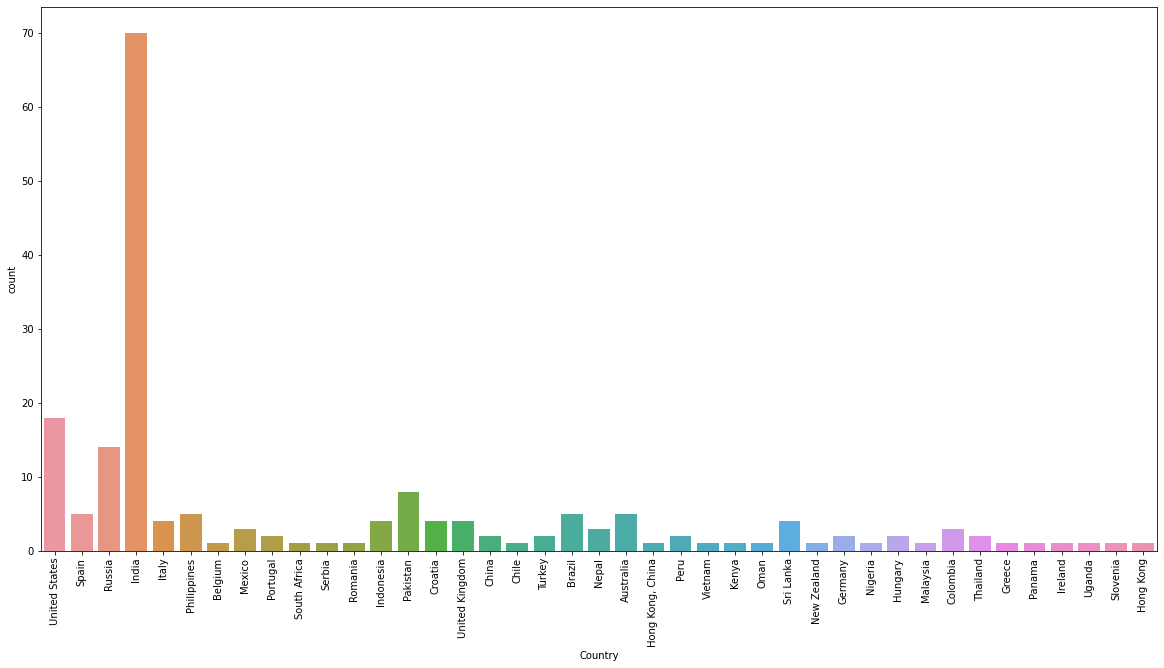

In [25]:
# most countires have injuries 
plt.figure(figsize=(20,10))
sns.countplot(df['Country'])
plt.xticks(rotation= 90)
plt.show()

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


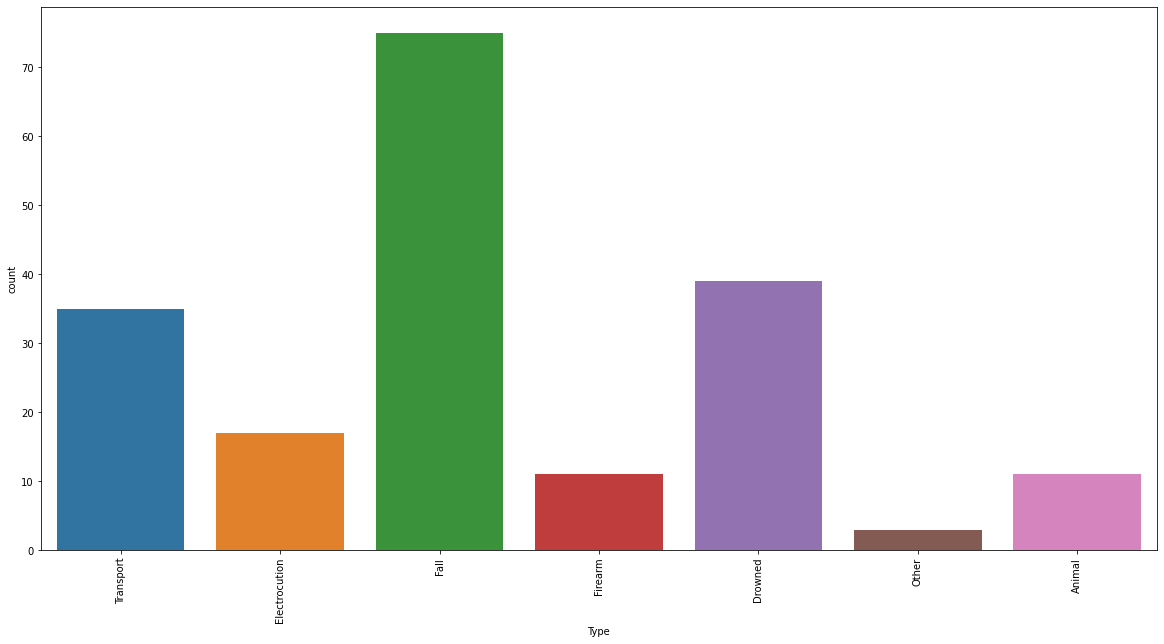

In [27]:
# most type of injuries 
plt.figure(figsize=(20,10))
sns.countplot(df['Type'])
plt.xticks(rotation= 90)
plt.show()

<AxesSubplot:xlabel='Date', ylabel='Injuries/Casualties'>

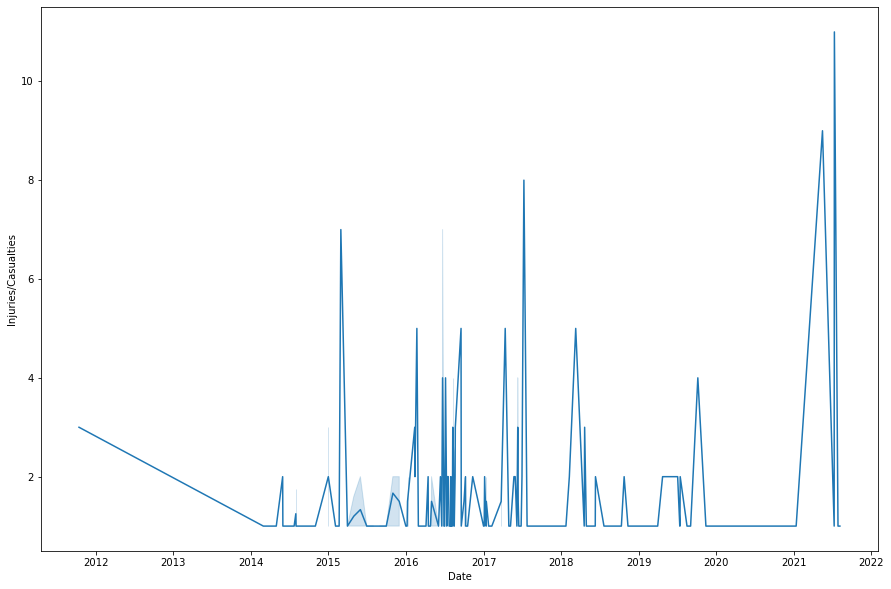

In [31]:
# Show number of injuries by year 
plt.figure(figsize=(15,10))
sns.lineplot(data = df , x = 'Date' , y = "Injuries/Casualties")

<AxesSubplot:xlabel='Country'>

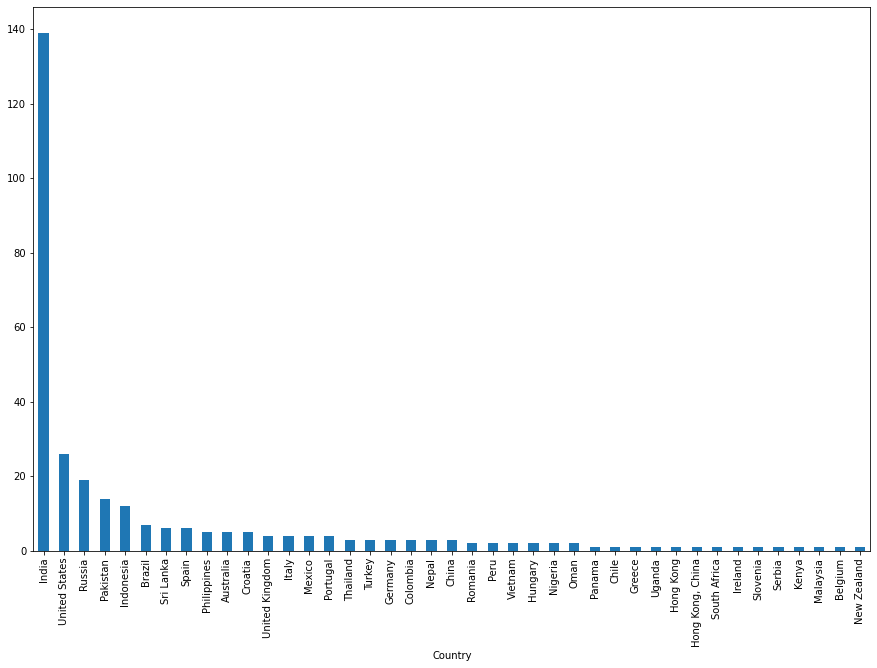

In [41]:
# Total of injuries in each country
Countryinj = df.groupby('Country')['Injuries/Casualties'].sum()
Countryinj.sort_values(ascending = False , inplace = True)
Countryinj.plot(kind = 'bar' , figsize = (15,10))